In [1]:
import torch
from NLPUtils import *
from datetime import datetime

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [16]:
with open('../15-Training-word-vectors/text8','r') as file:
    corpus = file.read()
    corpus = [corpus.split(' ')[:100]]

In [17]:
#corpus = [['hola', 'soy', 'lauti'],['hola', 'soy', 'guadi'], ['chau', 'soy', 'luna','me','quiero','ir']]

# Hiperparámetros:
method = 'SkipGram'
window_size = 8
embedding_dim = 200
cutoff_freq = 1
batch_size = 256
use_gpu = 1

trainer_200 = Word2vecTrainer(corpus,cutoff_freq=cutoff_freq,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu)

Word2vec trainer created:
Model used: SkipGram
Window size: 8
Embedding dimension: 200
Number of samples: 41
Vocabulary Size: 13
Number of batches: 1
Number of samples per batch: 256



In [18]:
parameters = None
requires_grad = None

trainer_200.InitParameters(params_dict=parameters,requires_grad_dict=requires_grad)

In [17]:
trainer_200.SaveEmbeddings('./vectors-25-01.bin')

Embeddings saved to file ./vectors-25-01.bin


In [19]:
epochs = 1
learning_rate = 1e-3
sample_loss_every = 100

trainer_200.SGDTrain(epochs=epochs, learning_rate=learning_rate, sample_loss_every=sample_loss_every)

Starting training...
Optimization method: Stochastic Gradient Descent
Learning Rate: 0.001
Number of epochs: 1
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 2.7048842906951904
Training finished



In [23]:
x, target  = next(iter(trainer_200.dataloader))
print(x,target)

tensor([10, 10,  9, 12, 10,  0, 12,  1, 11,  6, 10,  1,  6,  6, 11, 10,  5, 10,
        10,  6,  0,  0, 12,  8, 10,  3, 10,  5,  9,  5,  4,  7,  2,  2,  7,  8,
         3,  4,  0,  1,  4], device='cuda:1') tensor([[ 4,  0,  1,  5, 10, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [10,  6, 10,  7,  8,  5, 12,  0, 13, 13, 13, 13, 13, 13, 13, 13],
        [ 0, 11, 12, 11, 10,  6, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [ 0, 11,  9, 11, 10,  6, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [10,  1,  5,  1,  4, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [ 7, 10,  8,  5, 12, 11,  9, 12, 13, 13, 13, 13, 13, 13, 13, 13],
        [10,  7, 10,  8,  5,  0, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [ 4,  0,  8,  6, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [ 8,  5, 12,  0,  9, 12, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [ 6, 10,  7,  2, 10, 10,  7, 10,  8,  5, 13, 13, 13, 13, 13, 13],
        [10,  6, 10,  7,  2,  6, 10,  7, 10, 13, 13, 1

In [27]:
scores = torch.randn(41,13)
scores.view(-1,13,1).repeat(1,1,target.size(1)).size()

torch.Size([41, 13, 16])

In [13]:
for param in trainer_200.model.parameters():
    print(param)

Parameter containing:
tensor([[-0.4815, -2.1241, -0.3487, -0.5676,  0.2680, -0.3217, -0.1313, -0.8909,
          1.4322,  0.6676, -1.1523,  0.4231, -0.1941,  0.3955, -1.0644, -0.6070,
         -0.0816, -1.4627,  0.7879, -0.4522, -0.5872,  0.7224,  1.2877,  0.2780,
          1.5635, -0.5491,  0.2514, -0.7075, -1.5141,  0.7491,  1.0044,  0.9677,
          2.5708, -0.8093, -1.4668, -0.2873,  2.3228,  0.4554, -2.4749,  2.4940,
          0.2352,  0.8898, -0.3691,  0.2482, -1.5954,  1.8152, -0.5163, -0.4869,
          0.0323,  0.8634,  0.9470,  0.0318,  0.5050,  0.6084,  0.5565, -1.1681,
          2.3072, -0.9191,  0.5218, -0.8190, -0.7237,  0.2414,  0.7581,  0.3917,
         -0.8558, -0.3036, -0.2482,  0.8964, -0.3982, -0.5629,  0.4130,  0.4405,
         -0.0716,  1.2861,  0.6111, -0.0199,  1.7069, -0.3009,  0.7132, -0.8985,
          0.5518, -1.0705,  0.8856, -1.1064,  1.0977,  0.0158, -0.2969,  1.0050,
         -0.4278,  0.6159,  0.2141, -0.8689, -0.7423,  1.2416, -1.1049,  0.2087,
      

# TO DO: 


# 1. REVISAR LA PARTE DE INICIALIZACIÓN, CARGA Y GUARDADO DEL MODELO (CAMBIAR `InitEmbeddings` POR `InitParameters` Y SIMPLIFICAR)


# 2. HACER MUESTRAS POR SEPARADO (UNAS PARA CBOW Y OTRA PARA SKIPGRAM


# 3. PROBAR CAMBIANDO EL LAYER nn.Embedding POR UNO nn.Linear

<IPython.core.display.Javascript object>


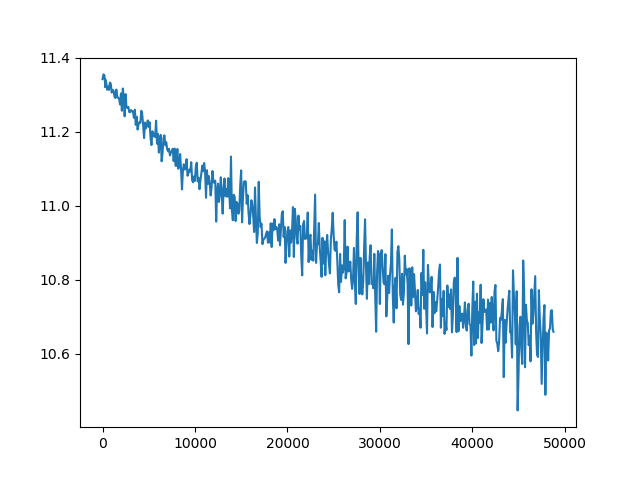

In [14]:
fig, ax = plt.subplots()
ax.plot(trainer_200.loss_history['iter'],trainer_200.loss_history['loss'])

In [15]:
word_list = ['anarchism', 'anarcho', 'man', 'woman', 'love', 'god', 
             'hate', 'king', 'queen', 'italy', 'france', 'paris', 'rome']

trainer_200.GetCloseVectors(word_list, firsts=20)

Word			Closest Words			Cosine Distance
-----------------------------------------------------------------------
anarchism		visigoths			0.273493
			stowaway			0.263500
			adduced				0.262936
			homeric				0.258786
			ethnologue			0.256947
			indifferent			0.256418
			undifferentiated			0.256109
			farc				0.255447
			chivalrous			0.255000
			anarchic			0.253422
			herringbone			0.251782
			detterman			0.248966
			pelt				0.247486
			holtenau			0.244853
			chronicler			0.243915
			cairngorms			0.243877
			plotted				0.243210
			republic			0.242219
			cabinets			0.239070
			planck				0.239012

anarcho			gorgon				0.316961
			lng				0.286264
			delinquency			0.276514
			vyasa				0.276374
			alesia				0.271497
			stalling			0.269809
			redesignated			0.267295
			stripper			0.265309
			zealander			0.265170
			pit				0.263249
			retronym			0.262366
			practicing			0.260160
			ventris				0.257616
			infirmities			0.257001
			tansley				0.256945
			fuckin				0.248360
			apportionment			0.247669
